In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Desactivar las advertencias relacionadas con el ajuste del diseño de la figura
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Definir los colores deseados
colors = {'Female': 'pink', 'Male': 'navy'}

In [2]:
# Carga el conjunto de datos con el tipo de datos especificado
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

# Muestra las columnas de todas las tablas
# print("1. multiple_choice_response: ", multiple_choice_responses.columns) 
# print("2. other_text_responses: ", other_text_responses.columns)
# print("3. questions_only: ", questions_only.columns)
# print("4. survey_schema: ", survey_schema)

multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom',
                                       inplace = True)

C:\Users\yumik\AppData\Local\Temp\ipykernel_23080\2027171698.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom',


In [3]:
print("\nInformation of multiple_choice_responses:")
print(multiple_choice_responses.info())

print("\nFirst few rows of multiple_choice_responses:")
print(multiple_choice_responses.head(3))

print("\nDimensions of multiple_choice_responses:", multiple_choice_responses.shape)

print("\nColumns of multiple_choice_responses:")
print(multiple_choice_responses.columns)



Information of multiple_choice_responses:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB
None

First few rows of multiple_choice_responses:
  Time from Start to Finish (seconds)                           Q1  \
0               Duration (in seconds)  What is your age (# years)?   
1                                 510                        22-24   
2                                 423                        40-44   

                                       Q2  \
0  What is your gender? - Selected Choice   
1                                    Male   
2                                    Male   

                                       Q2_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe...   
1                                                 -1   
2                                                 -1   

                        

In [4]:
# Gender Distribution
# Seleccionar la columna Q2 y asignar un nombre de columna adecuado
genders = multiple_choice_responses[['Q2']].drop(multiple_choice_responses.index[0])
genders.columns = ['Gender']

# Reemplazar las categorías 'Prefer to self-describe' y 'Prefer not to say' por una nueva categoría 'Other'
genders['Gender'] = genders['Gender'].replace(['Prefer to self-describe', 'Prefer not to say'], 'Other')

# Filtrar solo Female, Male y Other
filtered_genders = genders[genders['Gender'].isin(['Female', 'Male', 'Other'])]

# Agrupar y contar la cantidad de cada uno
gender_distr = filtered_genders.groupby('Gender').size().reset_index(name='Respondents')

# Filtrar solo Female y Male, y luego agrupar y contar la cantidad de cada uno
# gender_distr = genders[(genders['Gender'] == 'Female') | (genders['Gender'] == 'Male')].groupby('Gender').size().reset_index(name='Respondents')

gender_distr

,Gender,Respondents
0,Female,3212
1,Male,16138
2,Other,367


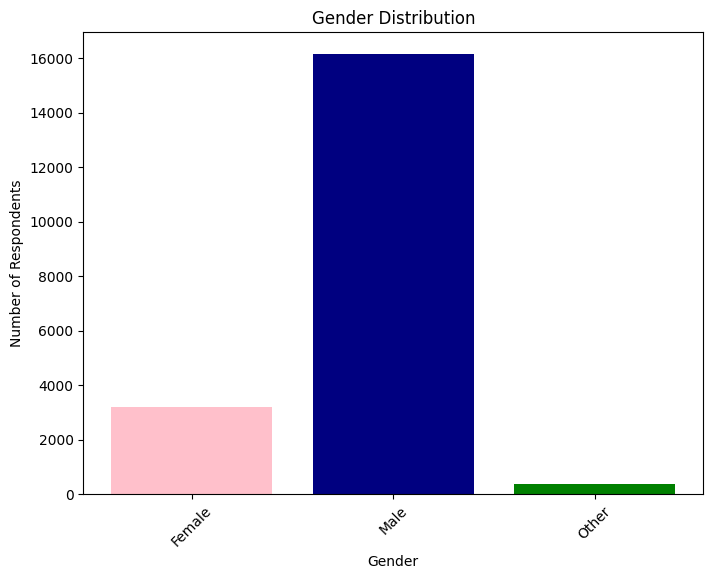

In [5]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(gender_distr['Gender'], gender_distr['Respondents'], color=['pink', 'navy', 'green'])

# Personalizar el gráfico
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.show()

In [6]:
# Gender Distribution
# Calcular el total de encuestados
total_respondents = gender_distr['Respondents'].sum()

# Calcular el porcentaje de encuestados de cada género
gender_distr['Percentage'] = (gender_distr['Respondents'] / total_respondents) * 100
gender_distr['Percentage'] = round(gender_distr['Percentage'], 2)

# Imprimir los resultados
print("Gender Distribution")
gender_distr


Gender Distribution


,Gender,Respondents,Percentage
0,Female,3212,16.29
1,Male,16138,81.85
2,Other,367,1.86


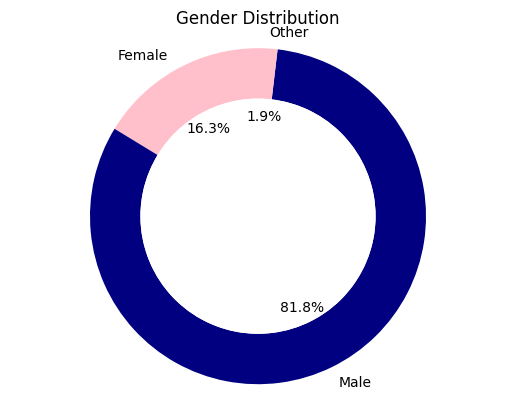

In [7]:
# Gender Distribution
# Crear el grafico de Donuts
labels = gender_distr['Gender']
sizes = gender_distr['Respondents']
colors = ['pink', 'navy', ]  # Colores para cada género

# Crear el gráfico de dona
fig, ax = plt.subplots()
ax.set_title('Gender Distribution')

# Crear el donut chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Agregar un círculo blanco en el centro para crear el donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Ajustar el aspecto para que sea un círculo
ax.axis('equal')

plt.show()

In [8]:
# Gender Distribution by Country
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

loc = pd.crosstab(demographics['Country'], demographics['Gender'])

# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)
loc['Total'] = loc['Female'] + loc['Male']

loc_sorted = loc.sort_values(by='Total', ascending=False)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)
loc.head(10)

Gender,Female,Male,Total
Country,,,
India,771.0,3958.0,4729.0
United States of America,624.0,2387.0,3011.0
Other,159.0,842.0,1001.0
Canada,99.0,334.0,433.0
Germany,91.0,432.0,523.0
United Kingdom,91.0,379.0,470.0
China,84.0,469.0,553.0
Brazil,79.0,643.0,722.0
Russia,77.0,543.0,620.0


In [9]:
# Gender Distribution by Country
# Calcular el total de encuestados por país
loc['Total'] = loc['Female'] + loc['Male']

# Calcular el porcentaje de encuestados de cada género en cada país
loc['Female_Percentage'] = (loc['Female'] / loc['Total']) * 100
loc['Male_Percentage'] = (loc['Male'] / loc['Total']) * 100

# Imprimir los resultados
print("Gender Distribution by Country")
# print(loc[['Female_Percentage', 'Male_Percentage']])

loc[['Female_Percentage', 'Male_Percentage']]

Gender Distribution by Country


Gender,Female_Percentage,Male_Percentage
Country,,
India,16.303658,83.696342
United States of America,20.724012,79.275988
Other,15.884116,84.115884
Canada,22.863741,77.136259
Germany,17.399618,82.600382
United Kingdom,19.361702,80.638298
China,15.189873,84.810127
Brazil,10.941828,89.058172
Russia,12.419355,87.580645


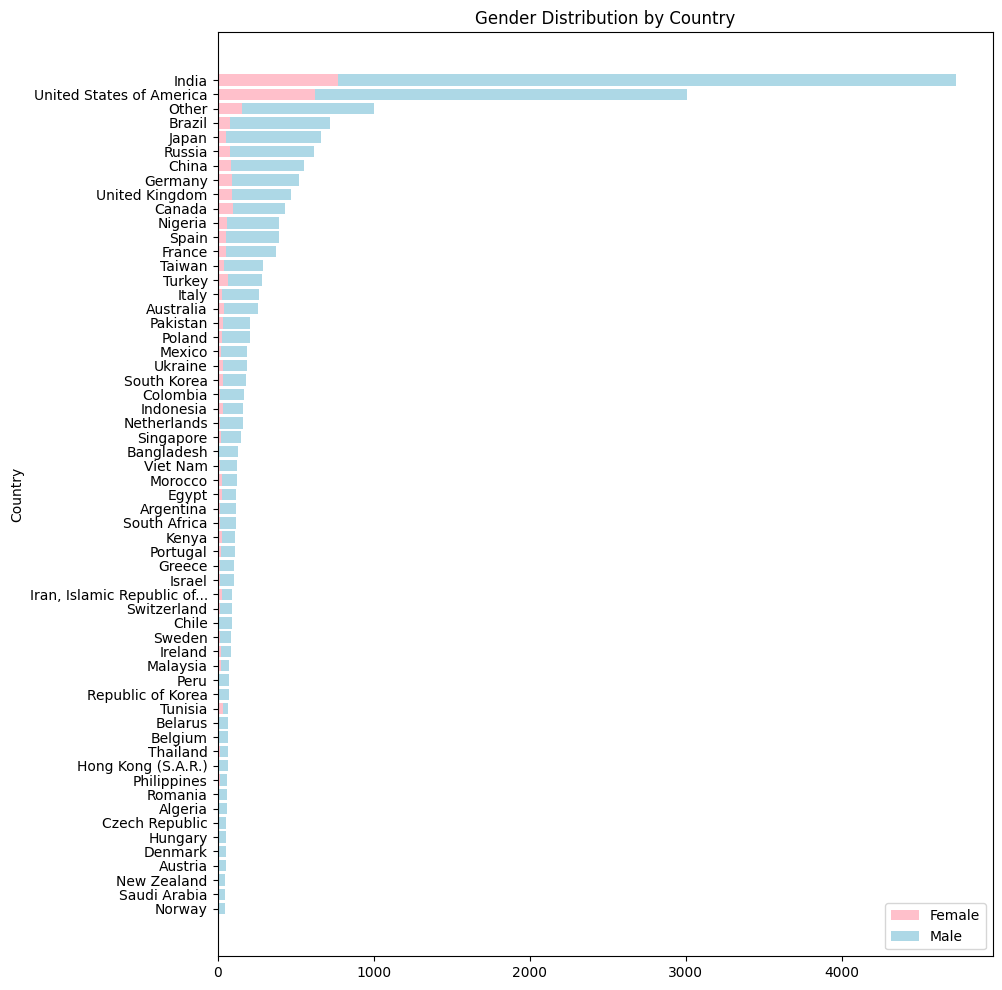

In [10]:
# Ordenar el DataFrame por el total de encuestados
loc_sorted = loc.sort_values(by='Total', ascending=True)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 12))

# Crear el gráfico de barras horizontal
ax.barh(loc_sorted.index, loc_sorted['Female'], color='pink', label='Female')
ax.barh(loc_sorted.index, loc_sorted['Male'], left=loc_sorted['Female'], color='lightblue', label='Male')

# Configurar etiquetas y título
# ax.set_xlabel('Percentage')
ax.set_ylabel('Country')
ax.set_title('Gender Distribution by Country')
ax.legend()

# Mostrar el gráfico
# plt.tight_layout()
plt.show()


C:\Users\yumik\AppData\Local\Temp\ipykernel_23080\227474539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")


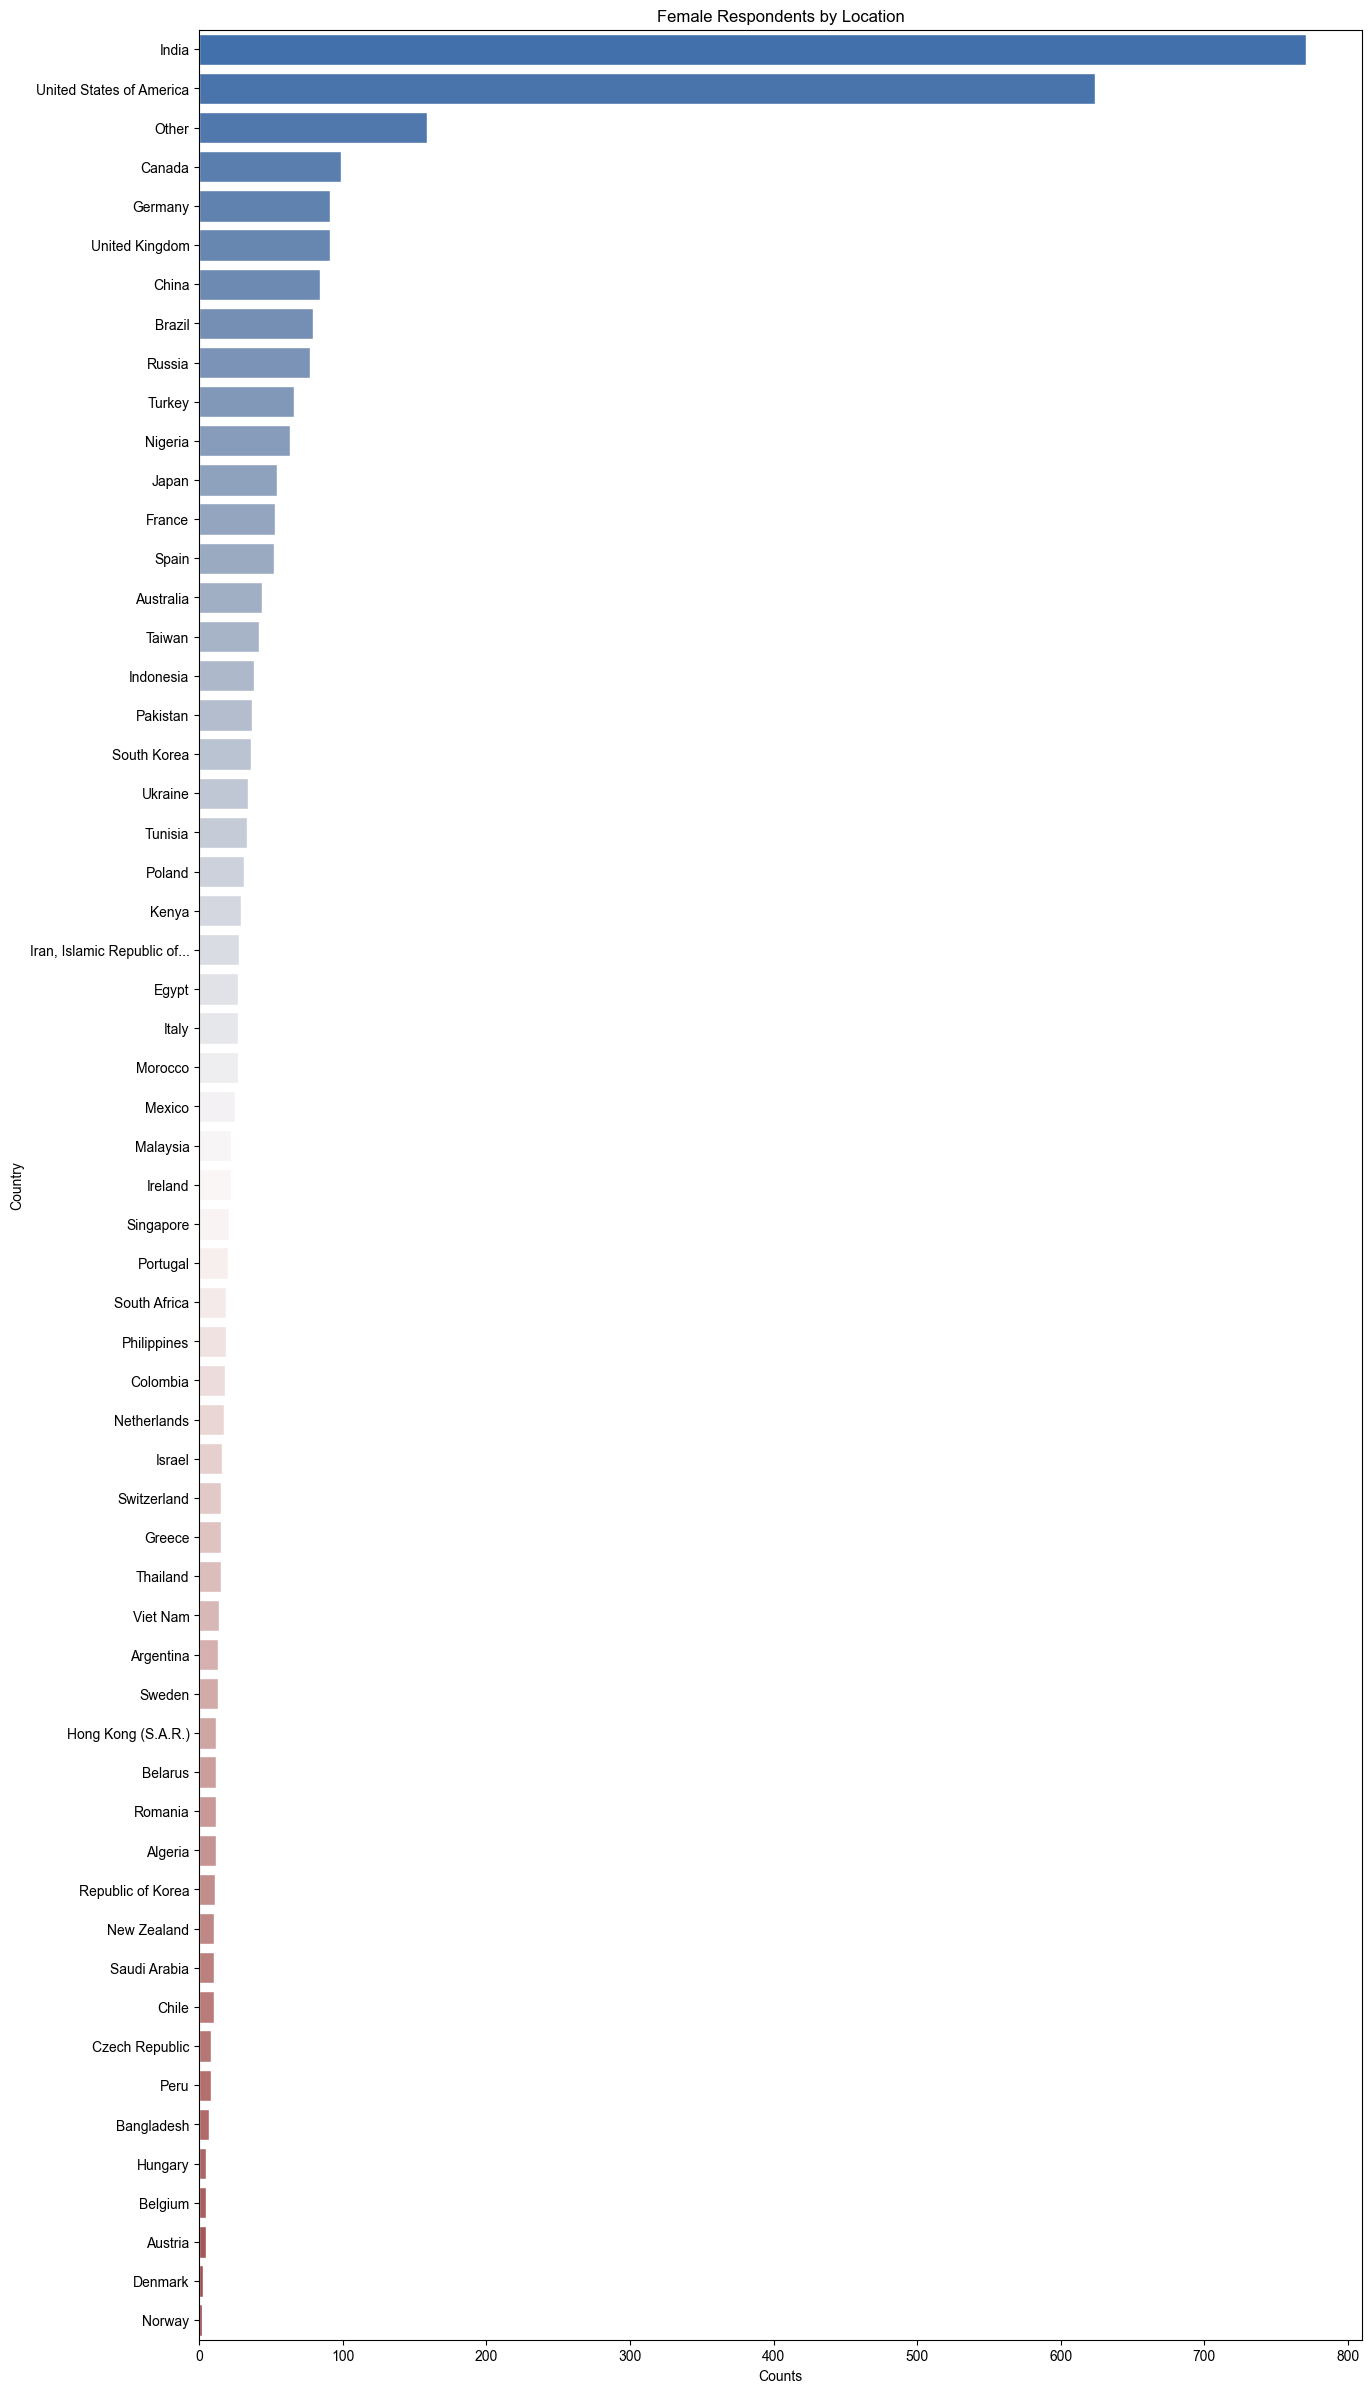

In [11]:
# Gender Distribution by Country - Female Respondents by Location
# Creando el gráfico de barras horizontal
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location')
ax.set(xlabel='Counts')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()

In [12]:
# Female Respondents by Location (Percentage)
# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = female + male
    loc.at[i, 'Female'] = round((female / total) * 100, 2)  # Calculando el porcentaje y redondeando a 2 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Imprimir los resultados
print("Female Respondents by Location (Percentage)")

# print(loc[['Female']])
#  loc[['Female']]

Female Respondents by Location (Percentage)


In [13]:
# Dividiendo el DataFrame en dos mitades
half_rows = len(loc) // 2

# Imprimiendo la mitad superior del DataFrame
print("Mitad Superior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[:half_rows]


Mitad Superior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Tunisia,48.53
Philippines,31.67
"Iran, Islamic Republic of...",29.47
Malaysia,29.33
Kenya,25.44
Ireland,25.29
Turkey,23.24
Indonesia,23.03
Canada,22.86


In [14]:
# Imprimiendo la mitad inferior del DataFrame
print("\nMitad Inferior de los Porcentajes de Mujeres por Ubicación")
loc[['Female']].iloc[half_rows:]


Mitad Inferior de los Porcentajes de Mujeres por Ubicación


Gender,Female
Country,
Switzerland,15.96
Other,15.88
Israel,15.38
China,15.19
Republic of Korea,15.07
Poland,14.90
Sweden,14.77
Taiwan,14.38
France,14.06


C:\Users\yumik\AppData\Local\Temp\ipykernel_23080\1140033198.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(loc['Female']), y=loc.index, ax=ax, palette="vlag")


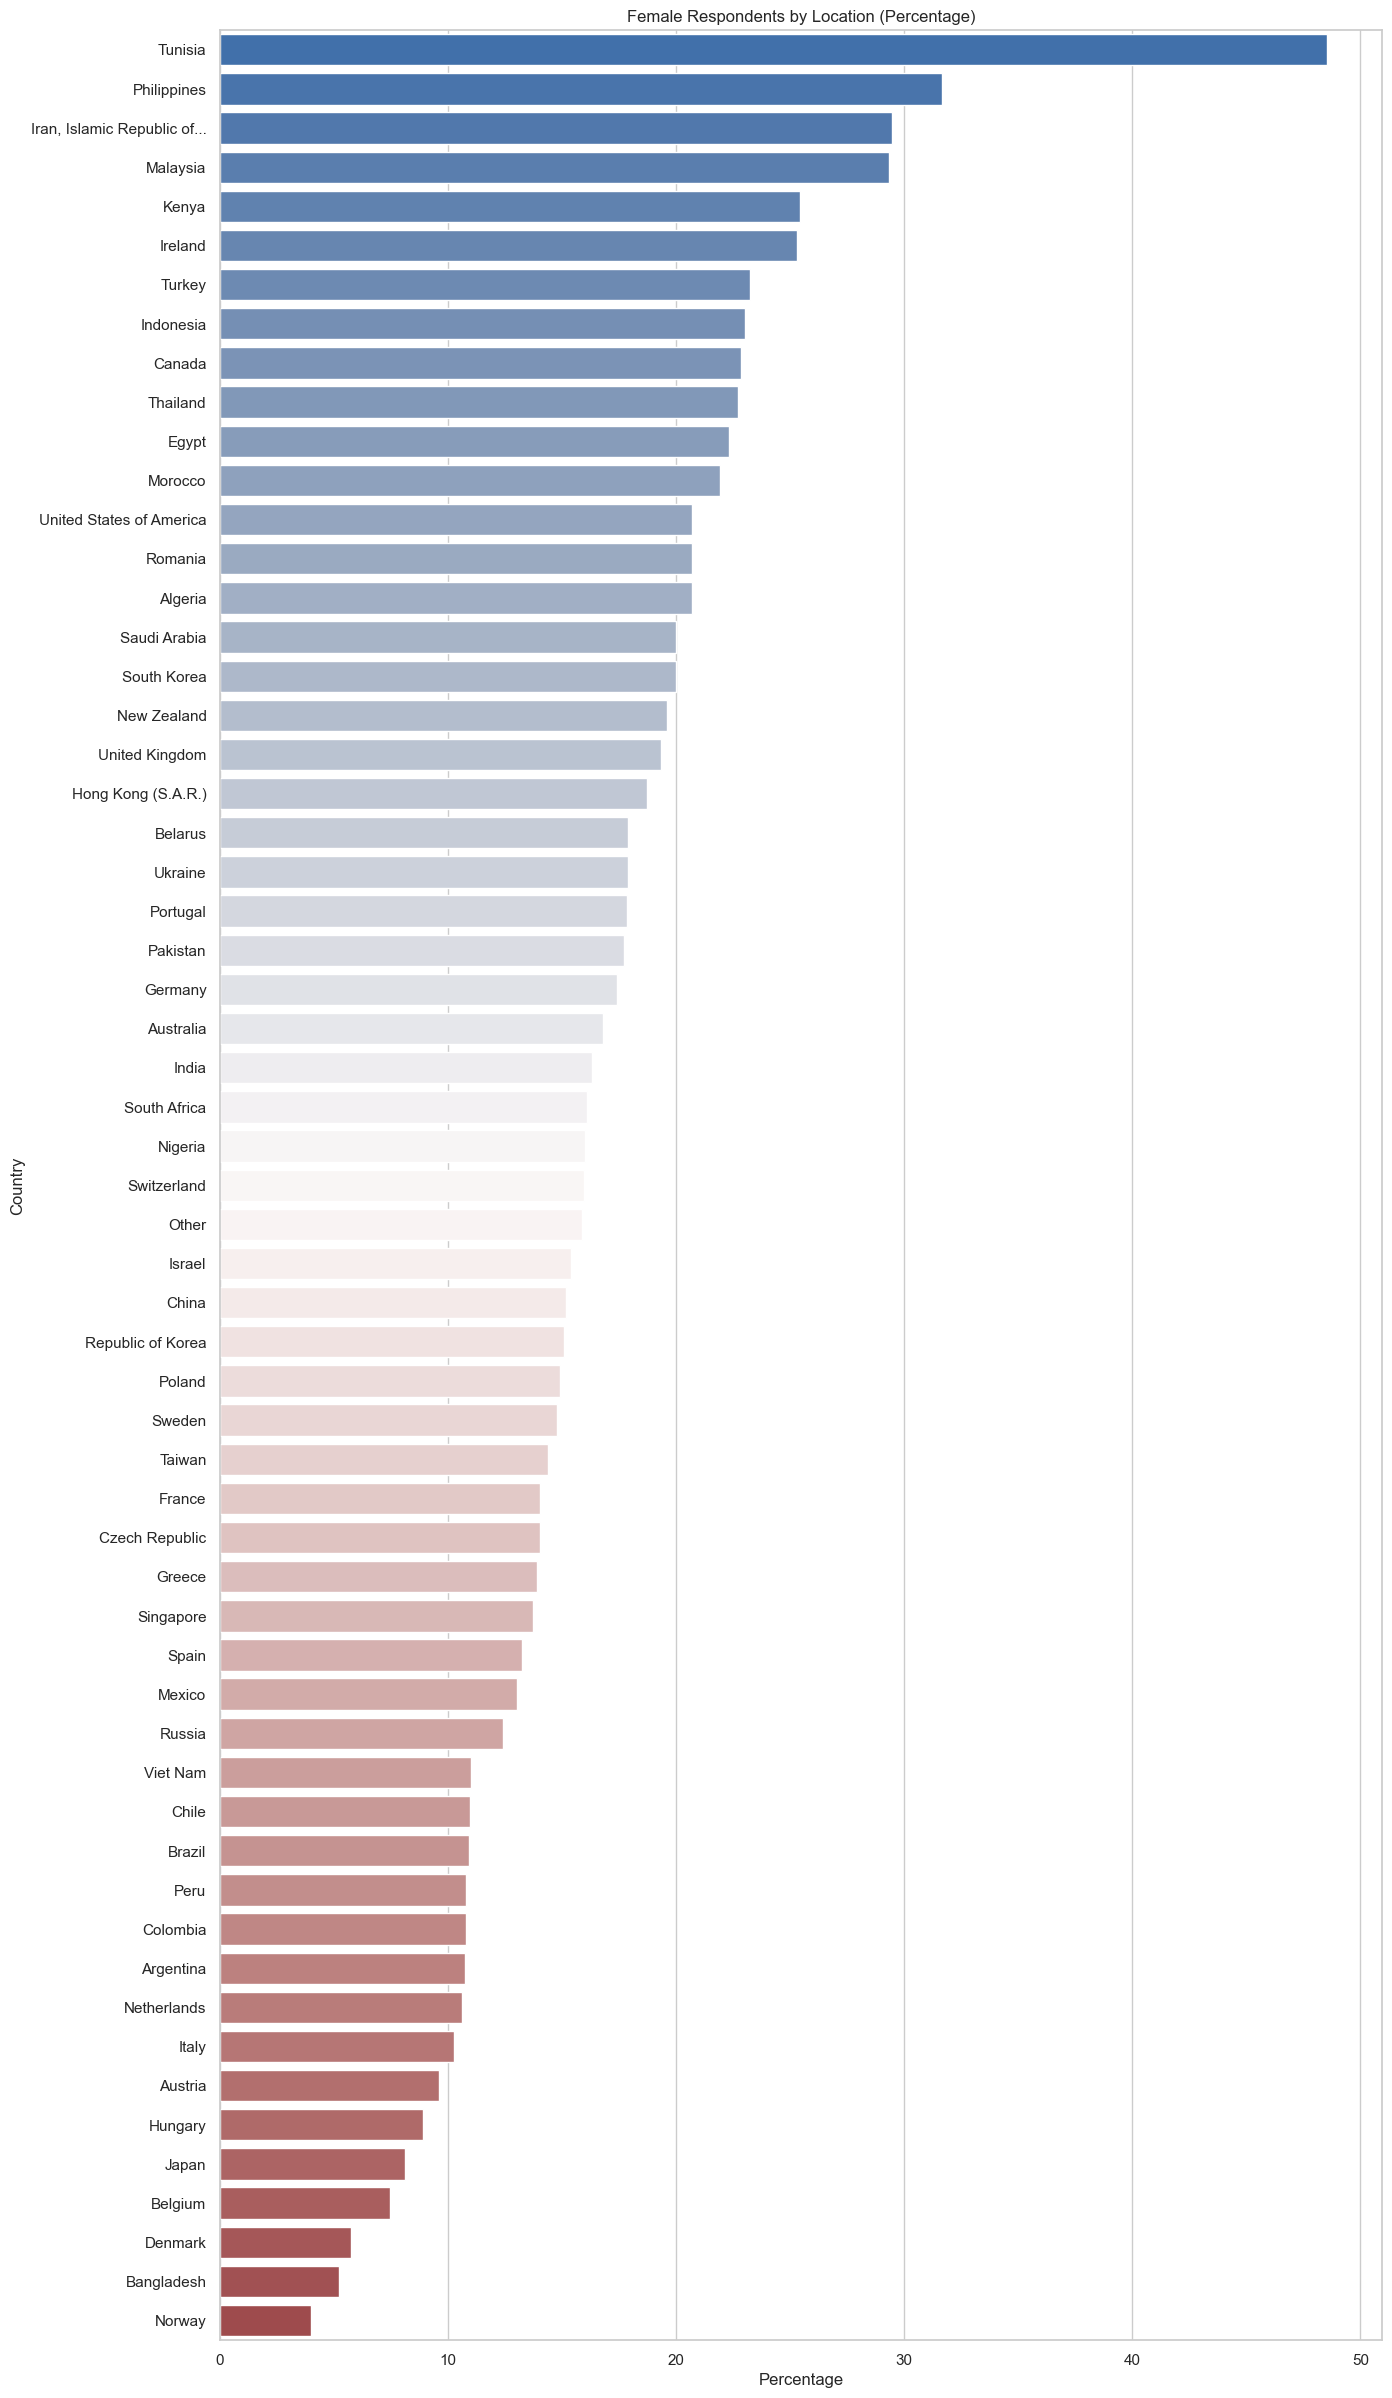

In [15]:
# Female Respondents by Location (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location (Percentage)')
ax.set(xlabel='Percentage')
sns.set(style='whitegrid')
ax = sns.barplot(x=list(loc['Female']), y=loc.index, ax=ax, palette="vlag")
plt.show()

In [16]:
# Gender Distribution by Age Group
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
age = pd.crosstab(demographics['Age_Group'], demographics['Gender'])
age['Female'] = age['Female'].astype(float)
age['Male'] = age['Male'].astype(float)

totals = demographics.groupby('Age_Group').agg({'Gender':'count'})

demographics

,Age_Group,Gender,Country
1,22-24,Male,France
2,40-44,Male,India
3,55-59,Female,Germany
4,40-44,Male,Australia
5,22-24,Male,India
...,...,...,...
19713,50-54,Male,Japan
19714,18-21,Male,India
19715,35-39,Male,India
19716,25-29,Male,India


In [17]:
# Gender Distribution by Age Group - Age Group Distribution
# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame({
    'Age_Group': totals.index,
    'Total_Gender': totals['Gender'],
    'Female_Respondents': age['Female'],
    'Male_Respondents': age['Male']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Total_Gender,Female_Respondents,Male_Respondents
Age_Group,,,,
18-21,18-21,2468,419.0,2049.0
22-24,22-24,3558,678.0,2880.0
25-29,25-29,4372,810.0,3562.0
30-34,30-34,3065,513.0,2552.0
35-39,35-39,2047,304.0,1743.0
40-44,40-44,1410,209.0,1201.0
45-49,45-49,928,118.0,810.0
50-54,50-54,678,80.0,598.0
55-59,55-59,408,51.0,357.0


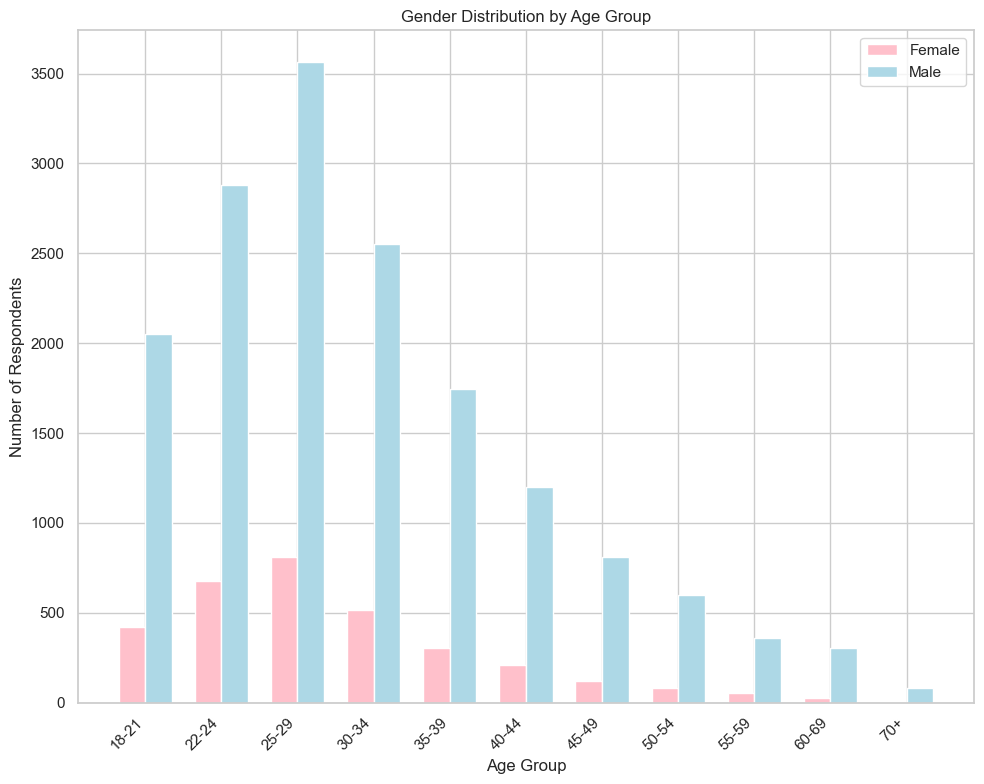

In [18]:

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Obtener los rangos de edades y la cantidad de encuestados por grupo de edad
age_groups = results_df['Age_Group']
total_gender = results_df['Total_Gender']
female_respondents = results_df['Female_Respondents']
male_respondents = results_df['Male_Respondents']

# Configurar la posición de las barras para cada grupo de edad
bar_width = 0.35
index = range(len(age_groups))

# Crear las barras para las mujeres
bar1 = ax.bar(index, female_respondents, bar_width, label='Female', color='pink')

# Crear las barras para los hombres
bar2 = ax.bar([i + bar_width for i in index], male_respondents, bar_width, label='Male', color='lightblue')

# Configurar etiquetas y título
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Respondents')
ax.set_title('Gender Distribution by Age Group')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(age_groups)
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\yumik\AppData\Local\Temp\ipykernel_23080\2144898385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.index, y=totals['Gender'], palette="rocket", ax=ax)


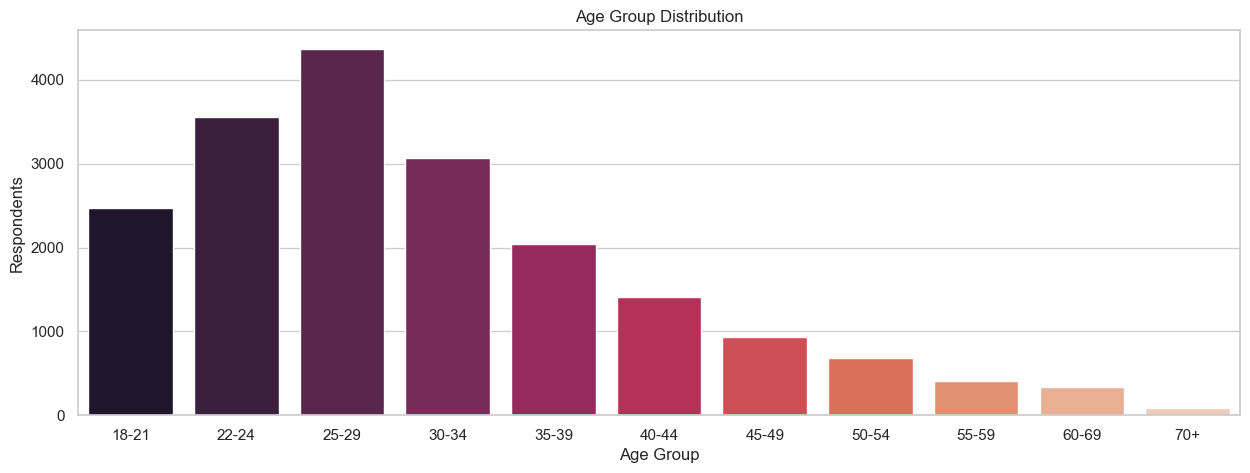

In [19]:
# Gender Distribution by Age Group - Age Group Distribution
# Crear el gráfico de barras horizontal
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Age Group Distribution')
ax.set(xlabel='Age Group', ylabel='Respondents')
sns.set(style='whitegrid')
sns.barplot(x=totals.index, y=totals['Gender'], palette="rocket", ax=ax)
plt.show()

In [20]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Calcular los porcentajes de mujeres por grupo de edad
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = female + male
    age.at[i, 'Female'] = round((female / total) * 100, 2)  # Convertir a porcentaje y redondear a 2 decimales

# Eliminar la columna 'Male' si deseas incluir solo el porcentaje de mujeres
age = age.drop(['Male'], axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Age_Group': age.index,
    'Female_Percentage': age['Female']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Female_Percentage
Age_Group,,
18-21,18-21,16.98
22-24,22-24,19.06
25-29,25-29,18.53
30-34,30-34,16.74
35-39,35-39,14.85
40-44,40-44,14.82
45-49,45-49,12.72
50-54,50-54,11.80
55-59,55-59,12.50


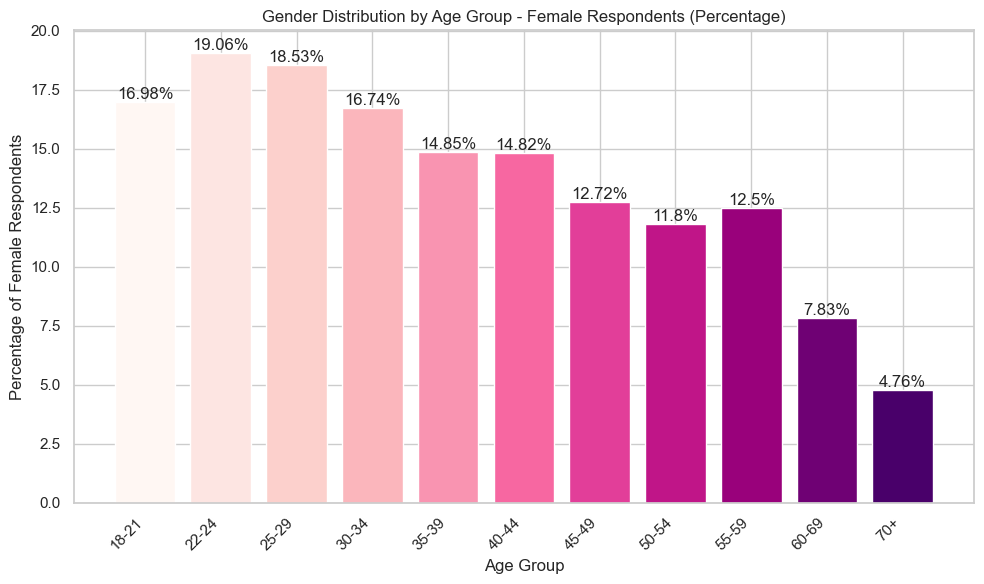

In [21]:
# Obtener los datos del DataFrame
age_groups = results_df['Age_Group']
female_percentages = results_df['Female_Percentage']

# color de las barras con una escala de colores rosados
colors = plt.cm.RdPu(np.linspace(0, 1, len(age_groups)))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(age_groups, female_percentages, color=colors)

# Configurar etiquetas y título
plt.xlabel('Age Group')
plt.ylabel('Percentage of Female Respondents')
plt.title('Gender Distribution by Age Group - Female Respondents (Percentage)')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas de porcentaje en las barras
for bar, percentage in zip(bars, female_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage}%', 
             ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\yumik\AppData\Local\Temp\ipykernel_23080\4264538549.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=age.index, y=age['Female'], palette="rocket")


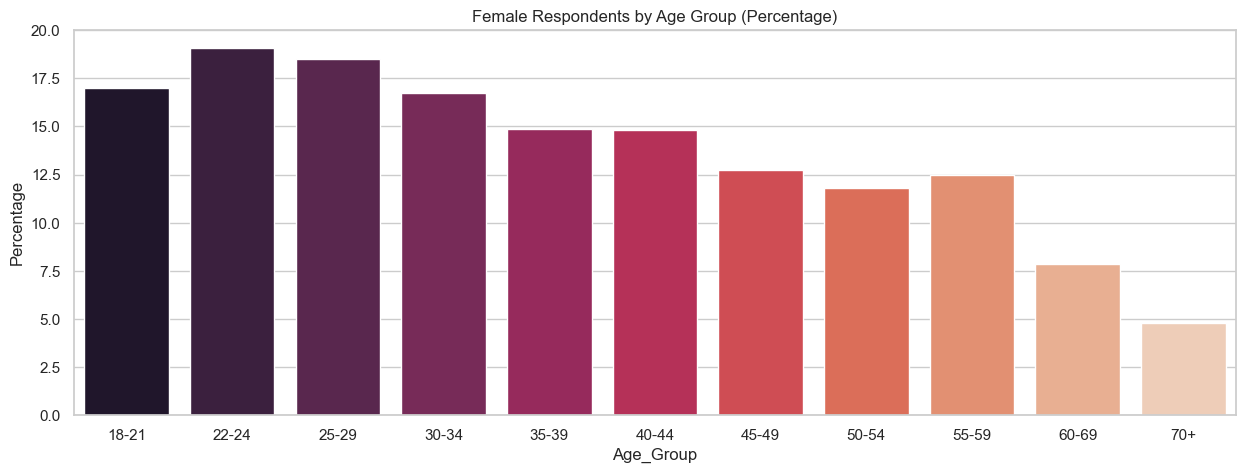

In [22]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.set_title('Female Respondents by Age Group (Percentage)')
ax.set(ylabel='Percentage')
sns.set(style='whitegrid')

ax = sns.barplot(x=age.index, y=age['Female'], palette="rocket")

plt.show()

In [23]:
# Career and Education
# Filtrar los datos solo para mujeres y hombres
women = multiple_choice_responses[multiple_choice_responses['Q2']=='Female'].copy()
men = multiple_choice_responses[multiple_choice_responses['Q2']=='Male'].copy()

# Agrupar por título de trabajo y contar el número de ocurrencias
jobs = women.groupby('Q5', as_index=False).agg({'Q1':'count'})
jobs = jobs.rename(columns={'Q1':'Count', 'Q5':'Job_Title'})
jobs = jobs.sort_values(by=['Count'], ascending = False)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Job_Title': jobs['Job_Title'],
    'Count': jobs['Count']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Job_Title,Count
11,Student,764
4,Data Scientist,606
2,Data Analyst,347
9,Software Engineer,313
6,Other,258
8,Research Scientist,241
5,Not employed,214
0,Business Analyst,132
7,Product/Project Manager,83
3,Data Engineer,76


In [24]:
women

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
8,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
16,485,50-54,Female,-1,United States of America,Master’s degree,Data Analyst,-1,50-249 employees,1-2,...,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
21,1529,22-24,Female,-1,Ireland,Master’s degree,Data Analyst,-1,"1000-9,999 employees",10-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
29,528,30-34,Female,-1,Ukraine,Doctoral degree,Research Scientist,-1,"1000-9,999 employees",3-4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,95,30-34,Female,-1,Australia,Doctoral degree,Research Scientist,-1,"1000-9,999 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19692,290,30-34,Female,-1,India,Master’s degree,Data Scientist,-1,"> 10,000 employees",15-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19695,119,22-24,Female,-1,India,Bachelor’s degree,Software Engineer,-1,"> 10,000 employees",1-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
19696,55,25-29,Female,-1,Japan,Bachelor’s degree,Software Engineer,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [25]:
# Agrupar por título de trabajo y género, y contar el número de ocurrencias
women_jobs = women.groupby(['Q5'], as_index=False).agg({'Q1': 'count'})
men_jobs = men.groupby(['Q5'], as_index=False).agg({'Q1': 'count'})

# Renombrar las columnas
women_jobs = women_jobs.rename(columns={'Q1': 'Count_Women', 'Q5': 'Job_Title'})
men_jobs = men_jobs.rename(columns={'Q1': 'Count_Men', 'Q5': 'Job_Title'})

# Fusionar los datos de hombres y mujeres en el DataFrame final
results_df = pd.merge(women_jobs, men_jobs, on='Job_Title', how='outer')

# Llenar los valores faltantes con 0
results_df = results_df.fillna(0)

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Job_Title,Count_Women,Count_Men
0,Business Analyst,132,634
1,DBA/Database Engineer,17,136
2,Data Analyst,347,1231
3,Data Engineer,76,534
4,Data Scientist,606,3431
5,Not employed,214,699
6,Other,258,1387
7,Product/Project Manager,83,627
8,Research Scientist,241,1198
9,Software Engineer,313,2338


NameError: name 'count_women' is not defined

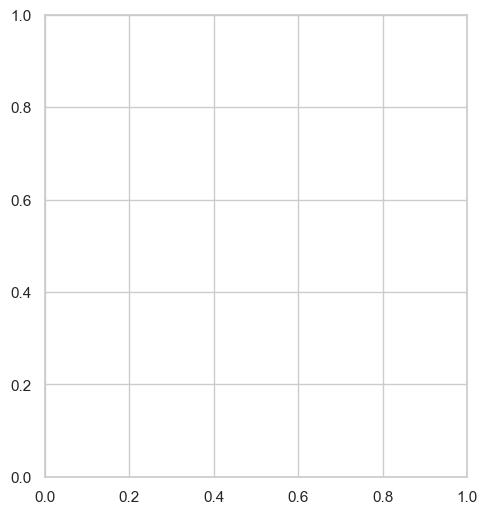

In [26]:
# Configurar el tamaño de la figura y crear los subgráficos
plt.figure(figsize=(12, 6))

# Subgráfico para mujeres
plt.subplot(1, 2, 1)
plt.bar(index, count_women, bar_width, color=colors['Women'], label='Women')
for i, w in enumerate(count_women):
    plt.text(i, w + 0.5, f"{(w / (w + count_men[i]) * 100):.2f}%", ha='center', va='bottom', color='black', fontsize=8)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Women')
plt.xticks(index, categories, rotation=90, fontsize=8)  # Tamaño del texto ajustado
plt.legend()

# Subgráfico para hombres
plt.subplot(1, 2, 2)
plt.bar(index, count_men, bar_width, color=colors['Men'], label='Men')
for i, m in enumerate(count_men):
    plt.text(i, m + 0.5, f"{(m / (count_women[i] + m) * 100):.2f}%", ha='center', va='bottom', color='black', fontsize=8)
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Men')
plt.xticks(index, categories, rotation=90, fontsize=8)  # Tamaño del texto ajustado
plt.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



In [ ]:
# Career and Education - Job Titles (Women only)
# Crear el gráfico 

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('Job Titles (Women only)')
sns.set(style='whitegrid')
ax = sns.barplot(x='Count', y='Job_Title', palette="deep", data=jobs)

plt.show()

In [ ]:
# Career and Education - Job Fields (Women only)
# Lista de trabajos en STEM y no claros
stem = ['Data Scientist', 'Data Analyst', 'Software Engineer', 'Research Scientist', 
        'Data Engineer', 'DBA/Database Engineer', 'Statistician']
unclear = ['Business Analyst', 'Product/Project Manager']

jobs['Job_Field'] = [ 'STEM' if x in stem else 'Unclear' if x in unclear else x for x in jobs['Job_Title'] ]
field = jobs.groupby('Job_Field', as_index=False).agg({'Count':'sum'})
field = field.sort_values(by=['Count'], ascending=False)
field['Count'] = field['Count'].astype(float)

total = field['Count'].sum()

for i in field.index:
    count = field.at[i, 'Count']
    field.at[i, 'Count'] = round(count / total,4)

field = field.rename(columns={'Count':'Percentage'})

# Crear un DataFrame con los resultados
result_df = pd.DataFrame(field)

# Visualizar los resultados en un DataFrame
print("Resultados del porcentaje de trabajos por campo:")
result_df


In [ ]:
# Career and Education - Job Fields (Women only)
# # Crear el gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Job Fields (Women only)')
sns.set(style='whitegrid')

sns.barplot(x='Percentage', y='Job_Field', data=field)

plt.show()

In [ ]:
# Career and Education - Degrees
education = women.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = men.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = education.rename(columns={'Q1':'Count','Q4':'Education'}).sort_values(by=['Count'], ascending = False)
education.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education.replace("No formal education past high school", "High School", inplace = True)
education.replace("I prefer not to answer", "No answer", inplace = True)


postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education['Category'] = [ 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu 
                         else 'Undergrad' if x == "Bachelor’s degree" else x for x in education['Education'] ]

edu_cat = education.groupby('Category', as_index = False).agg({'Count':'sum'})
edu_cat['Count'] = edu_cat['Count'].astype(float)
total = edu_cat['Count'].sum()

for i in edu_cat.index:
    count = edu_cat.at[i, 'Count']
    edu_cat.at[i, 'Count'] = round(count / total,4)
    
edu_cat = edu_cat.rename(columns={'Count':'Percentage'}).sort_values(by=['Percentage'], ascending = False)

# Visualizar los resultados en un DataFrame
print("Resultados de Education")
education

In [ ]:
# Career and Education - Degrees for Women
education_women = women.groupby('Q4', as_index=False).agg({'Q1':'count'})
education_women = education_women.rename(columns={'Q1':'Count', 'Q4':'Education'}).sort_values(by=['Count'], ascending=False)
education_women['Gender'] = 'Female'  # Agregar una columna 'Gender' con el valor 'Female' para todas las filas

# Career and Education - Degrees for Men
education_men = men.groupby('Q4', as_index=False).agg({'Q1':'count'})
education_men = education_men.rename(columns={'Q1':'Count', 'Q4':'Education'}).sort_values(by=['Count'], ascending=False)
education_men['Gender'] = 'Male'  # Agregar una columna 'Gender' con el valor 'Male' para todas las filas

# Combina los DataFrames de educación para mujeres y hombres
education_combined = pd.merge(education_women, education_men, on='Education', suffixes=('_women', '_men'), how='outer')

# Renombra las columnas Count para distinguir entre mujeres y hombres
education_combined = education_combined.rename(columns={'Count_women':'Count_women', 'Count_men':'Count_men'})
education_combined.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education_combined.replace("No formal education past high school", "High School", inplace = True)
education_combined.replace("I prefer not to answer", "No answer", inplace = True)

# Crea la columna 'Category' basada en el tipo de educación
postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education_combined['Category'] = education_combined['Education'].apply(lambda x: 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu else 'Undergrad')

# Reordena las columnas según el requisito
education_combined = education_combined[['Education', 'Count_women', 'Count_men', 'Category']]

# Visualizar los resultados en un DataFrame
print("Resultados de Education (Combined)")
education_combined


In [ ]:
# Configurar los datos
education_levels = education_combined['Education']
count_women = education_combined['Count_women']
count_men = education_combined['Count_men']

# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Grafico para mujeres
axs[0].bar(education_levels, count_women, color='pink', label='Women')
axs[0].set_title('Women in Each Education Level')
axs[0].set_xlabel('Education Level')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)
axs[0].legend()

# Grafico para hombres
axs[1].bar(education_levels, count_men, color='skyblue', label='Men')
axs[1].set_title('Men in Each Education Level')
axs[1].set_xlabel('Education Level')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)
axs[1].legend()

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [ ]:
# Definir los datos
categories = education_combined['Education']
count_women = education_combined['Count_women']
count_men = education_combined['Count_men']

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Dibujar las barras para mujeres y hombres
plt.bar(categories, count_women, label='Women')
plt.bar(categories, count_men, bottom=count_women, label='Men')

# Configurar el eje y el título
plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Comparison of Education Category Between Men and Women')
plt.xticks(rotation=45)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
print("Resultados Degree Categories")
edu_cat


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Degree Categories')
sns.set(style='whitegrid')

# ax = sns.barplot('Percentage', 'Category', ax=ax, palette="deep", data=edu_cat)
sns.barplot(x='Percentage', y='Category', palette="deep", data=edu_cat, ax=ax)

plt.show()

In [ ]:
# Low Salaries: Occupation
low_salary_women = women[women['Q10']=='$0-999']
lows_women = low_salary_women.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows_women = lows_women.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows_women = lows.sort_values(by=['Count'], ascending = False)

# Low Salaries: Occupation
low_salary_men = men[men['Q10']=='$0-999']
lows_men = low_salary_men.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows_men = lows_men.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows_men = lows_men.sort_values(by=['Count'], ascending = False)

print("Low Salaries: Occupation")
lows_men

In [ ]:
# Low Salaries: Occupation
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Low Salaries: Occupation')
sns.set(style='whitegrid')


sns.barplot(x='Count', y='Occupation', palette="deep", data=lows)
plt.show()

In [ ]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

salaries_women = women.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_women['Range_Start'] = salaries_women.Range.apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != 0]


salaries_men = men.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_men['Range_Start'] = salaries_men.Range.apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != 0]

print("Low Salaries: Range")
salaries_men

In [ ]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women.groupby('Q10', as_index=False).agg({'Q1':'count'})
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries_women['Range_Start'] = salaries_women.Range.apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != 0]

salaries_women = salaries_women.rename(columns={'Q1': 'Count', 'Q5': 'Occupation'})

salaries_women



In [ ]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

salaries_women.head()




In [ ]:

# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados

# Configuración del gráfico de dispersión
plt.figure(figsize=(12, 8))

# Gráfico de dispersión de ocupación y rango salarial
plt.scatter(salaries_women['Range_Start'], salaries_women['Occupation'], s=salaries_women['Count']*10, color='fuchsia', alpha=0.7)

# Etiquetas y título
plt.xlabel('Rango Salarial')
plt.ylabel('Ocupación')
plt.title('Rango Salarial por Ocupación (Mujeres)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show() 


In [ ]:
# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

# Salarios: Ocupación para hombres
salaries_men = men[['Q10', 'Q5']]
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_men['Count'] = 1

salaries_men['Range_Start'] = salaries_men['Range'].astype(str).apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]  # Filtrar valores predeterminados

# Configuración del gráfico de dispersión
plt.figure(figsize=(12, 8))

# Gráfico de dispersión de ocupación y rango salarial
plt.scatter(salaries_men['Range_Start'], salaries_men['Occupation'], s=salaries_men['Count']*10, color='navy', alpha=0.7)

# Etiquetas y título
plt.xlabel('Rango Salarial')
plt.ylabel('Ocupación')
plt.title('Rango Salarial por Ocupación (Hombres)')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Función para convertir rangos de salario a valores numéricos
def convert_range_to_numeric(range_str):
    if isinstance(range_str, str):
        range_str = range_str.replace('$', '')  # Eliminar el símbolo de dólar
        if '-' in range_str:
            range_values = range_str.split('-')
            start = int(range_values[0].replace(',', ''))  # Eliminar comas
            end = int(range_values[1].replace(',', ''))  # Eliminar comas
            return round((start + end) / 2, 2)  # Redondear a 2 decimales
    return -1  # Valor predeterminado para rangos no válidos


# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

    
# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados


# Aplicar la función para convertir rangos a valores numéricos
salaries_women['Range_Start'] = salaries_women['Range'].apply(convert_range_to_numeric)


# Filtrar valores no válidos
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()

# Visualización de los resultados
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)
print(average_salary_women)



In [ ]:
# Función para convertir rangos de salario a valores numéricos
def convert_range_to_numeric(range_str):
    if isinstance(range_str, str):
        range_str = range_str.replace('$', '')  # Eliminar el símbolo de dólar
        if '-' in range_str:
            range_values = range_str.split('-')
            start = int(range_values[0].replace(',', ''))  # Eliminar comas
            end = int(range_values[1].replace(',', ''))  # Eliminar comas
            return round((start + end) / 2, 2)  # Redondear a 2 decimales
    return -1  # Valor predeterminado para rangos no válidos


# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])


# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados


# Aplicar la función para convertir rangos a valores numéricos
salaries_women['Range_Start'] = salaries_women['Range'].apply(convert_range_to_numeric)


# Filtrar valores no válidos
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)


# Salarios: Ocupación para hombres
salaries_men = men[['Q10', 'Q5']]
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_men['Count'] = 1

salaries_men['Range_Start'] = salaries_men['Range'].astype(str).apply(lambda x: find_number(x))

salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]  # Filtrar valores predeterminados

# Aplicar la función para convertir rangos a valores numéricos
salaries_men['Range_Start'] = salaries_men['Range'].apply(convert_range_to_numeric)

# Filtrar valores no válidos
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_men = salaries_men.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_men['Range_Start'] = average_salary_men['Range_Start'].round(2)

# Unir los promedios de salarios de hombres y mujeres
average_salary_combined = average_salary_women.merge(average_salary_men, on='Occupation', suffixes=('_women', '_men'))

# Visualización de los resultados
average_salary_combined


In [ ]:
import matplotlib.pyplot as plt

# Plotting average salaries for men and women by occupation
plt.figure(figsize=(10, 6))

plt.plot(average_salary_combined['Occupation'], 
         average_salary_combined['Range_Start_men'], 
         marker='o', color='blue', label='Men')

plt.plot(average_salary_combined['Occupation'], 
         average_salary_combined['Range_Start_women'], 
         marker='o', color='fuchsia', label='Women')

plt.title('Comparison of Average Salaries between Men and Women by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:


# Gender Distribution by Age Group - Age Group Distribution
# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame({
    'Age_Group': totals.index,
    'Total_Gender': totals['Gender'],
    'Female_Respondents': age['Female'],
    'Male_Respondents': age['Male']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

In [ ]:
# Función para convertir rangos de salario a valores numéricos
def convert_range_to_numeric(range_str):
    if isinstance(range_str, str):
        range_str = range_str.replace('$', '')  # Eliminar el símbolo de dólar
        if '-' in range_str:
            range_values = range_str.split('-')
            start = int(range_values[0].replace(',', ''))  # Eliminar comas
            end = int(range_values[1].replace(',', ''))  # Eliminar comas
            return round((start + end) / 2, 2)  # Redondear a 2 decimales
    return -1  # Valor predeterminado para rangos no válidos

# Low Salaries: Range
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    elif 'na' in x:
        return -1  # Valor predeterminado para 'na'
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

In [ ]:
# Salarios: Ocupación para mujeres
salaries_women = women[['Q10', 'Q5','Q1']]
salaries_women = salaries_women.rename(columns={'Q10':'Range', 'Q5':'Occupation', 'Q1':'Age'})
salaries_women['Count'] = 1

salaries_women['Range_Start'] = salaries_women['Range'].astype(str).apply(lambda x: find_number(x))

salaries_women = salaries_women.sort_values(by=['Range_Start'])
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]  # Filtrar valores predeterminados


# Aplicar la función para convertir rangos a valores numéricos
salaries_women['Range_Start'] = salaries_women['Range'].apply(convert_range_to_numeric)


# Filtrar valores no válidos
salaries_women = salaries_women[salaries_women['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)

salaries_women

In [ ]:
# Low Salaries: Range
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', data=salaries)
ax.set_xticklabels(labels=salaries['Range'], rotation=30)
plt.show()


In [ ]:


# Agrupación por ocupación y cálculo del salario promedio para mujeres
average_salary_women = salaries_women.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_women['Range_Start'] = average_salary_women['Range_Start'].round(2)

# Salarios: Ocupación para hombres
salaries_men = men[['Q10', 'Q5']]
salaries_men = salaries_men.rename(columns={'Q10':'Range', 'Q5':'Occupation'})
salaries_men['Count'] = 1
salaries_men['Range_Start'] = salaries_men['Range'].astype(str).apply(lambda x: find_number(x))
salaries_men = salaries_men.sort_values(by=['Range_Start'])
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]  # Filtrar valores predeterminados
salaries_men['Range_Start'] = salaries_men['Range'].apply(convert_range_to_numeric)
salaries_men = salaries_men[salaries_men['Range_Start'] != -1]

# Agrupación por ocupación y cálculo del salario promedio para hombres
average_salary_men = salaries_men.groupby('Occupation')['Range_Start'].mean().reset_index()
average_salary_men['Range_Start'] = average_salary_men['Range_Start'].round(2)

# Unir los promedios de salarios de hombres y mujeres
average_salary_combined = average_salary_women.merge(average_salary_men, on='Occupation', suffixes=('_women', '_men'))

# Calcular los porcentajes de mujeres por grupo de edad
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = female + male
    age.at[i, 'Female'] = round((female / total) * 100, 2)  # Convertir a porcentaje y redondear a 2 decimales

# Eliminar la columna 'Male' si deseas incluir solo el porcentaje de mujeres
age = age.drop(['Male'], axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Age_Group': age.index,
    'Female_Percentage': age['Female']
})

# Combinar los DataFrames de salarios de mujeres y hombres con el DataFrame de edades
salaries_age = results_df.merge(average_salary_combined, left_on='Age_Group', right_on='Occupation')

# Eliminar la columna 'Occupation' para que solo quede la edad como clave
salaries_age = salaries_age.drop('Occupation', axis=1)

# Mostrar el DataFrame 'salaries_age'
print("DataFrame 'salaries_age':")
print(salaries_age)


In [ ]:
# Salaries - No Degree
women['Q4'].replace("No formal education past high school", "High School", inplace = True)
women['Q4'].replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
no_degree = women[(women['Q4']=='High School') | (women['Q4']=='Some college')]

no_degree_sal = no_degree.groupby('Q10', as_index=False).agg({'Q1':'count'})
no_degree_sal = no_degree_sal.rename(columns={'Q10':'Range', 'Q1':'Count'})

no_degree_sal['Range_Start'] = no_degree_sal.Range.apply(lambda x: find_number(x))

no_degree_sal = no_degree_sal.sort_values(by=['Range_Start'])

print("Salaries - No Degree")
no_degree_sal

In [ ]:
# Salaries - No Degree
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', palette="deep", data=no_degree_sal, ax=ax)
ax.set_xticklabels(labels=no_degree_sal['Range'], rotation=30)
plt.show()

In [ ]:
# Salaries - No Degree

no_degree_job = no_degree.groupby('Q5', as_index=False).agg({'Q1':'count'})
no_degree_job = no_degree_job.rename(columns={'Q5':'Education', 'Q1':'Count'})
no_degree_job = no_degree_job.sort_values(by=['Count'], ascending=False)

print("Job Title - No Degree")
no_degree_job


In [ ]:
# Salaries - No Degree
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Job Title - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Education', palette="deep", data=no_degree_job)
plt.show()

In [ ]:
women['Q15'].replace('I have never written code', 'None', inplace=True)
women['Q15'].replace(np.nan, 'No answer', inplace = True)

code = women.groupby('Q15', as_index = False).agg({'Q1':'count'})
code = code.rename(columns={'Q1':'Count', 'Q15':'Coding Experience'})
code = code.sort_values(by=['Count'], ascending = False)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Experience')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Coding Experience', ax=ax, palette="deep", data=code)
plt.show()

In [ ]:
beginner = ['< 1 years', '1-2 years']
mid = ['3-5 years', '5-10 years']
expert = ['10-20 years', '20+ years']

code['Level'] = [ 'Beginner' if x in beginner else 'Intermediate' if x in mid 
                 else 'Expert' if x in expert else x for x in code['Coding Experience']]

code_lvl = code.groupby('Level').agg({'Count':'sum'})
order = ['None','Beginner','Intermediate','Expert','No answer']
code_lvl = code_lvl.reindex(order).reset_index()

total = code_lvl['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Level - Women')
sns.set(style='whitegrid')
sns.barplot(x='Level', y='Count', ax=ax, palette="deep", data=code_lvl, estimator=lambda x: sum(x)/total*100.0)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
exploring = "We are exploring ML methods (and may one day put a model into production)"
no = "No (we do not use ML methods)"
women['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in women['Q8']]
men['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in men['Q8']]

ml = women.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml_m = men.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml = ml.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})
ml_m = ml_m.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})

total = ml['Count'].sum()
total_m = ml_m['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.set(style='whitegrid')
sns.barplot(x='Machine_Learning', y='Count', ax=ax[0], palette="deep", data=ml, estimator=lambda x: sum(x)/total*100.0)
sns.barplot(x='Machine_Learning', y='Count', ax=ax[1], palette="deep", data=ml_m, estimator=lambda x: sum(x)/total_m*100.0)
for a in ax:
    a.set(xlabel='Machine Learning', ylabel='Percentage')
ax[0].set_title('ML Usage - Women')
ax[1].set_title('ML Usage - Men')
plt.show()


In [ ]:
responses = women['Q1'].count()
responses_m = men['Q1'].count()
base = 'Q18_Part_'
counts = dict()
counts_m = dict()

palette = dict()
colours = sns.color_palette('deep',11)

for i in range(1, 12):
    col = base + str(i)
    count = women[col].count()
    count_m = men[col].count()
    lang_series = women[col].dropna()
    lang = lang_series.values[0] if len(lang_series) > 0 else None
    if lang:
        counts[lang] = count
        counts_m[lang] = count_m
        palette[lang] = colours[i - 1]
        
result = pd.DataFrame.from_dict(counts, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result = result.sort_values(by=['Count'], ascending = False)
result_m = pd.DataFrame.from_dict(counts_m, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result_m = result_m.sort_values(by=['Count'], ascending = False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Language', ax=ax[0], palette=palette, data=result, 
            estimator=lambda x: sum(x) / responses * 100.0)
sns.barplot(x='Count', y='Language', ax=ax[1], palette=palette, data=result_m, 
            estimator=lambda x: sum(x) / responses_m * 100.0)

for a in ax:
    a.set(ylabel='', xlabel='Percentage')
ax[0].set_title('Languages - Women')
ax[1].set_title('Languages - Men')
plt.show()

In [ ]:
python = women[women['Q18_Part_1']=='Python'].copy()

python['Q15'] = [ 'New' if x == '< 1 years' else 'Beginner' if x == '1-2 years' else 'Proficient' for x in python['Q15']]
py_exp = python.groupby('Q15').agg({'Q1':'count'})

py_order = ['New', 'Beginner', 'Proficient']
py_exp = py_exp.reindex(py_order).reset_index()
py_exp = py_exp.rename(columns={'Q15':'Experience', 'Q1':'Count'})

total_py = py_exp['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Female Python Users')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_exp, 
            estimator=lambda x: sum(x) / total_py * 100.0)
ax.set(ylabel='Percentage')
plt.show()

In [ ]:
for i in python.index:
    count = 0
    for j in range(2,11):
        lang = python.at[i, (base + str(j))]
        if pd.isnull(lang) == False:
            count += 1
    python.at[i, 'Q18_Count'] = count
    
python['Multi_Language'] = [ '> 5' if x >= 5.0 else '2-4' if x > 2.0 
                            else 0 if x == 0.0 else 1 if x == 1.0 else 2 for x in python['Q18_Count']]
others = python.groupby(['Multi_Language', 'Q15']).agg({'Q1':'count'}).rename(columns={'Q1':'Count'})
others = pd.DataFrame(data={'Count': others['Count']}, index=others.index).reset_index()

py_only = others[others['Multi_Language']==0].drop(['Multi_Language'],axis=1).rename(columns={'Q15':'Experience'})
total_py_only = py_only['Count'].sum()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Python only (Female)')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_only, 
            estimator=lambda x: sum(x) / total_py_only * 100.0, order=py_order)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
cat_order = ['New', 'Beginner', 'Proficient']

sns.set(style='whitegrid')
g = sns.catplot(x='Multi_Language', y='Count', col='Q15', data=others, kind='bar', col_order=cat_order)
titles = ["New", "Beginner", "Proficient"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set(xlabel='Languages in Addition to Python')

plt.show()


In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 

In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 

In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 

In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 

In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 